In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]

In [3]:
df_DA_US = df_DA_US.explode("job_skills")

In [4]:
df_DA_US['job_posted_month'] = df_DA_US['job_posted_date'].dt.month_name()

In [5]:
df_plot = df_DA_US.groupby(['job_posted_month', 'job_skills']).size().reset_index(name='counts')

In [6]:
df_plot.sort_values(by=['job_posted_month', 'counts'], ascending=[True, False], inplace=True)

In [20]:
df_pivot = df_plot.pivot_table(index='job_posted_month', columns='job_skills', aggfunc='count', fill_value=0)
df_pivot

counts                                                  \
job_skills       airflow airtable alteryx angular ansible apl arch asana   
job_posted_month                                                           
April                  1        1       1       1       1   1    1     1   
August                 1        1       1       1       1   1    0     1   
December               1        1       1       1       1   0    1     1   
February               1        0       1       1       1   1    0     1   
January                1        1       1       1       1   1    0     1   
July                   1        1       1       1       1   1    1     1   
June                   1        1       1       1       1   1    1     1   
March                  1        1       1       1       1   1    1     1   
May                    1        1       1       1       1   1    1     1   
November               1        1       1       1       1   0    1     1   
October                1        1       1       1       1   0    1     1   
September              1        1       1       1       1   1    1     1   

                                       ...                                 \
job_skills       asp.net asp.net core  ... watson webex windows wire word   
job_posted_month                       ...                                  
April                  1            0  ...      1     1       1    1    1   
August                 1            0  ...      1     1       1    1    1   
December               1            0  ...      1     1       1    1    1   
February               1            0  ...      1     1       1    1    1   
January                1            0  ...      1     1       1    1    1   
July                   1            0  ...      1     1       1    1    1   
June                   1            0  ...      1     1       1    1    1   
March                  1            0  ...      1     1       1    1    1   
May                    1            0  ...      1     1       1    1    1   
November               1            0  ...      1     1       1    1    1   
October                1            1  ...      1     1       1    1    1   
September              1            0  ...      0     1       1    1    1   

                                                    
job_skills       workfront wrike xamarin yarn zoom  
job_posted_month                                    
April                    1     1       0    0    1  
August                   0     0       0    0    1  
December                 1     1       0    0    1  
February                 1     0       0    0    1  
January                  0     1       0    0    1  
July                     0     0       0    1    1  
June                     1     0       0    0    1  
March                    1     1       1    0    1  
May                      1     0       0    0    1  
November                 1     0       0    1    1  
October                  1     1       0    0    1  
September                0     0       0    1    1  

[12 rows x 218 columns]

In [21]:
import calendar
months = list(calendar.month_name)[1:]
months_present = [m for m in months if m in df_pivot.index]
df_pivot = df_pivot.loc[months_present]

In [22]:
df_skills = df_plot['job_skills'].value_counts().sort_values(ascending=False).head(5).index.tolist()

In [23]:
df_pivot = df_pivot[df_skills]

KeyError: "['sql' 'tableau' 'sas' 'power bi' 'r'] not in index"

In [ ]:
df_pivot

job_skills,sql,tableau,sas,power bi,r
job_posted_month,,,,,
January,1,1,1,1,1
February,1,1,1,1,1
March,1,1,1,1,1
April,1,1,1,1,1
May,1,1,1,1,1
June,1,1,1,1,1
July,1,1,1,1,1
August,1,1,1,1,1
September,1,1,1,1,1


<Axes: xlabel='job_posted_month'>

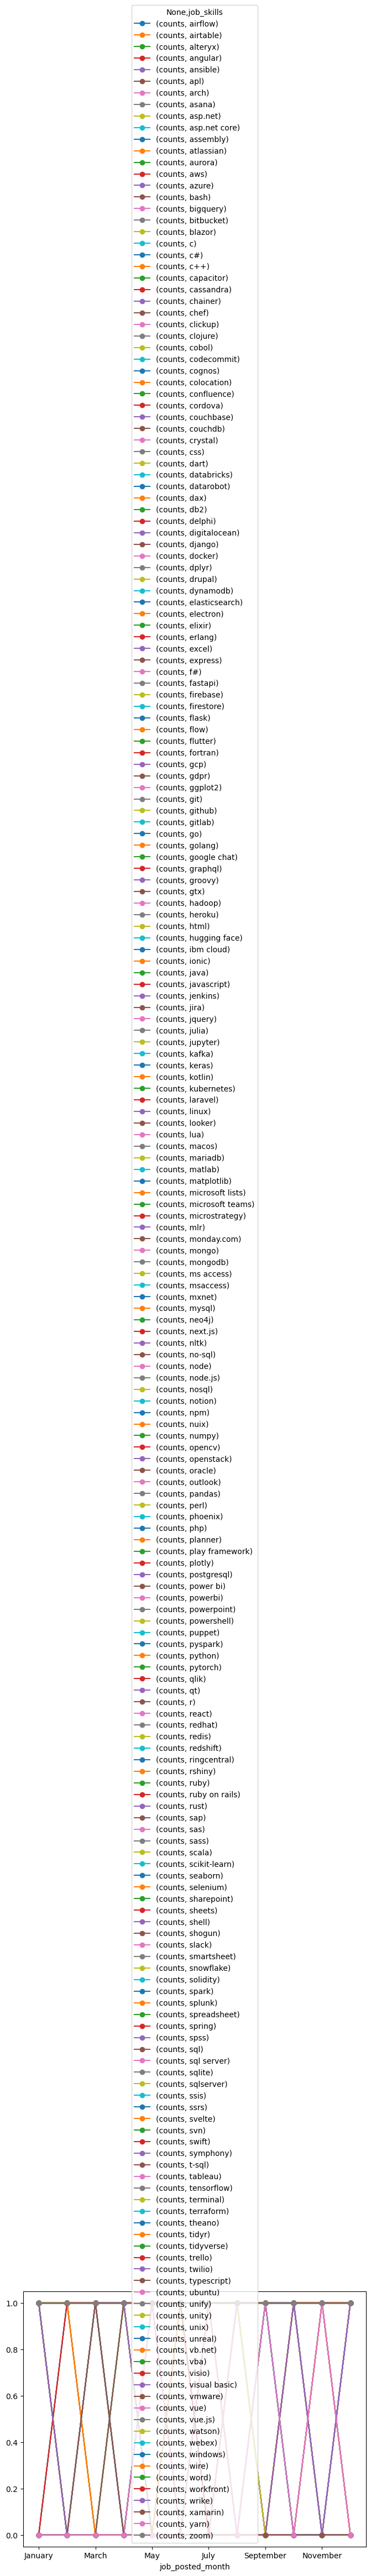

In [24]:
df_pivot.plot(kind='line', marker='o', figsize=(8, 6))

In [ ]:
jobs_per_month = df_DA_US.groupby('job_posted_month').size().reindex(months_present, fill_value=0)
jobs_per_month = jobs_per_month.to_frame(name='job_counts')

In [ ]:
preperc = df_pivot.merge(jobs_per_month, left_index=True, right_index=True)
preperc

,sql,tableau,sas,power bi,r,job_counts
job_posted_month,,,,,,
January,4601.0,2488.0,1832.0,1337.0,1513.0,32489
February,3168.0,1676.0,1212.0,1122.0,1045.0,23196
March,3226.0,1804.0,1238.0,1054.0,1141.0,23271
April,3220.0,1789.0,1302.0,1057.0,1038.0,23311
May,2581.0,1432.0,972.0,860.0,867.0,18803
June,2862.0,1628.0,984.0,989.0,1017.0,21418
July,2609.0,1533.0,996.0,881.0,881.0,19664
August,3414.0,1951.0,1276.0,1208.0,1271.0,25621
September,2295.0,1353.0,856.0,820.0,746.0,17489


In [ ]:
skill_cols = preperc.columns.drop('job_counts')

preperc[skill_cols] = (
    preperc[skill_cols]
    .div(preperc['job_counts'], axis=0)
    .mul(100)
)

preperc


,sql,tableau,sas,power bi,r,job_counts
job_posted_month,,,,,,
January,14.161716,7.657977,5.638832,4.115239,4.656961,32489
February,13.657527,7.225384,5.225039,4.837041,4.505087,23196
March,13.862748,7.752138,5.319926,4.529242,4.903098,23271
April,13.813221,7.674488,5.585346,4.534340,4.452833,23311
May,13.726533,7.615806,5.169388,4.573738,4.610966,18803
June,13.362592,7.601083,4.594267,4.617611,4.748343,21418
July,13.267901,7.795972,5.065094,4.480269,4.480269,19664
August,13.325007,7.614847,4.980290,4.714882,4.960774,25621
September,13.122534,7.736291,4.894505,4.688661,4.265538,17489


In [ ]:
preperc = preperc.drop(columns=['job_counts'])

In [ ]:
preperc

,sql,tableau,sas,power bi,r
job_posted_month,,,,,
January,14.161716,7.657977,5.638832,4.115239,4.656961
February,13.657527,7.225384,5.225039,4.837041,4.505087
March,13.862748,7.752138,5.319926,4.529242,4.903098
April,13.813221,7.674488,5.585346,4.534340,4.452833
May,13.726533,7.615806,5.169388,4.573738,4.610966
June,13.362592,7.601083,4.594267,4.617611,4.748343
July,13.267901,7.795972,5.065094,4.480269,4.480269
August,13.325007,7.614847,4.980290,4.714882,4.960774
September,13.122534,7.736291,4.894505,4.688661,4.265538


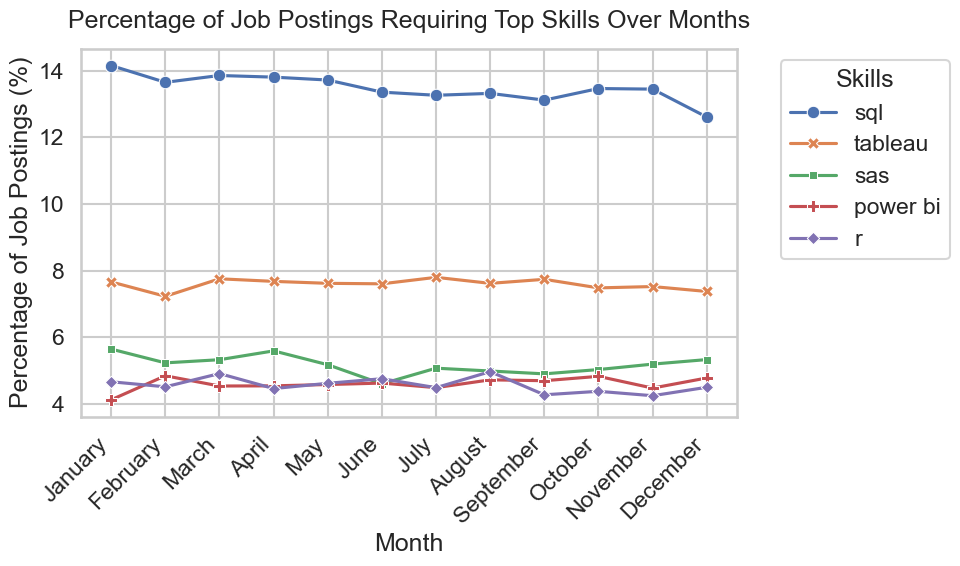

In [ ]:
sns.set_theme(style="whitegrid", context="talk")

plt.figure(figsize=(10, 6))

sns.lineplot(
    data=preperc[skill_cols],
    markers=True,
    dashes=False
)

plt.title('Percentage of Job Postings Requiring Top Skills Over Months', pad=15)
plt.xlabel('Month')
plt.ylabel('Percentage of Job Postings (%)')
plt.legend(title='Skills', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()